## Decision Trees
 
 Decision tree is the powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a feature(or test on an attribute), each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.
 In order to build a tree, we use an algorithm called CART(classification and regresion tree)

### Some basic terms:

 * Root Node: Base node of the tree, it represents the entire sample and this gets classified into two or more homogeneous sets.
 * Leaf Node: We get this when we reach at the end of the tree
 * Splitting: Dividing root node or sub-node to further sets based on some condition.
 * Decision Node: Nodes in between root and leaf.
 * Branch/Sub Tree: It is formed, when tree or node is splitted. In other words, it is a sub section of entire tree.
 * Pruning: It is opposite of splitting. It is removing of unwanted branches from tree.
 * Impurity: For example if a bag has just blue color balls and we have to find probability that we pick blue color ball only, then in that case impurity is zero. But if that same bag has different color balls, then impurity will be greater than 0.
 
* A game which probably uses decision trees concept: https://en.akinator.com/
 
### CART - Classification and Regression Trees:
* The logic of decision trees can be also applied to regression problems, hence the name CART.
* So, at some places, decision trees are also called CART.
 
## How decision trees work:

### Entropy:
* **It is the measure of impurity(or purity)**. 
* It defines randomness in data. It is the first step to solve the problem of decision tree. **In order to select best attribute of the node, which can be used for splitting further, we use entropy.**

* Entropy values ranges between 0 to 1(1 means completely impure subset, like when we have equal number of yes and no). 
* We calculate entropy for available attributes and finally choose one lowest entropy. **When we get 0 as entropy we call it as a pure sub split and then it is treated as leaf node**. The entropy equation uses logarithms because of many advantageous properties. The Main advantage is the additive property it provides.

* It is given by:

 ![Entropy](images/entropy.jpg)

	* Here 3 yes and 3 no is worst split and is impurest, where 4 yes and 0 no is best split and is purest.
	* For a single node, we can find which feature is to be selected among other features for splitting by considering featuring giving less entropy.
	* When we get pure split entropy(i.e. 0) we consider that as leaf node.
	* But this is just for a node, we have to check for whole sub-tree below too till leaf node and add their entropy values, to get best split possible. For this we use Information Gain.

**Extra notes about Entropy**:
* *If we have more than 2 classs, let's say 3 then how we can calculate entropy: -P1log(P1) - P2log(p2) - P3log(P3), where P1, P2, P3 are probabilities of class 1, 2 and 3 respectively.*
* For a 2 class problem, min entropy is 0 and max is 1, for more than 2 class min entropy is 0 but the max can be greater than 1.
* Both log₂ or logₑ can be used to calculate entropy.
* **Advantage of Entropy over Gini**: Sometimes in specific dataset, entropy gives more balanced trees compared to gini, so it is better to use hyperparameter tuning to check, using which we are getting good results. 


### Gini Impurity(or Gini Index)
* It is measure of impurity(or purity) used in build decision tree in CART.
* It is alternative to Entropy. In scikit learn library for DT and RF default value is `gini`.
	
    ![Gini Impurity](images/gini_impurity.png)

	* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group result in a Gini score of 0.5 (for a 2 class problem).
	* After this gini impurity or entropy we eventually calculate Information gain.
* For 2 class max value of entropy is 1 and for gini it is 0.5.
* **Advantage of Gini over entropy**: It is computationally fast.
 * Sometimes in algorithms, like random forest, XGBoost, gini impurity is used as parameter instead of entropy, because it is computationally efficient on large dataset(takes short time for execution) as we can see we don't do any logarithm operation in gini impurity. 



### Information Gain
* It measures the reduction in entropy, it decides which attribute should be selected as decision node. Constructing decision trees involves finding attribute that returns highest information gain. 
* **How should we decide which feature to take to do split first or at each step -- we use information gain.**
* It is given by:

 ![Information Gain](images/info_gain.png)
 	* Information gain calculates total entropy value from that node to bottom.
 	* We calculate entropy for each cases and then calculate information gain also, and then compare the information gain.
 	* Formula for Information gain is:

 	![Info gain](images/info_gain_formula.png)

 	* E(S) is entropy of the selected node(feature), S is the total subset, Si is node subset after splitting, E(Si) is entropy of the subset after splitting
 	* E(S) uses the same formula of entropy. We use summation as we have to consider all the feature of the subset.

#### Steps to calculate Information Gain:
1. Let's say we have this dataset, in first step we will calculate entropy of parent(i.e. before any splitting), using values of both classes yes and no, we get our parent entropy
![Info gain_step1](images/info_gain_step1.png)


2. Calculate entropy for each value for column Outlook

![Info gain_step2](images/info_gain_step2.png)

* Here we can see P(Overcast) is leaf node as its entropy as 0

3. In step 3, we calculate weighted entropy for children, here we multiply each entropy with weighted average
       Weighted Entropy: 5/14 * 0.97 + 4/14 * 0 + 5/14 * 0.97
       Weighted Entropy(Children): 0.69
        
       where 14 is total rows in entire dataset and 5, 4 and 4 in is number of rows in step 2 for each dataset

4. In step 4, we calculate information gain:
       Information Gain = E(Parent) - {Weighted Average} * E(Children)
       IG = 0.97 - 0.69 = 0.28

* So the information gain(or the decrease in entropy/impurity) when you split this data on the basis of Outlook condition/column is 0.28

5. In the step, similarly we calculate information gain for all the columns just like Outlook, and which ever column has the highest information gain, the algorithm will select that column to split the data.

6. Find information Gain recursively: Decision Tree then applies a recursive greedy search algorithm top bottom fashion to find the information gain at every level of tree. Once leaf node is reached(entropy = 0), no more splitting is done.

### Points to remember:
* **How purity is calculated, to know how good a particular split is:** Entropy or Gini Impurity
* **How the features are selected:** Information Gain


### Notes:
* When we want to split, then at each node we want best split value and best split threshold so to find which one is best feature to split.
* Our aim to get leaf node, when there is a pure split we get leaf node.
* Algorithm:
	- Start from the top node and at each node select best split on the basis of information gain.
	- Infomation gain can be calculated using immediate child entropies and parent entropy.
	- Greedy search is used: so loop over all features and all thresholds(all possible feature values)
	- Save the best split and split threshold at each node.
	- Build the like this recursively while considering some stop condition.
	- When leaf node is reached, store the most common label of the node.
	- Till above it will be done in training phase, now for predicting, again traverse the tree recursively
	- At each node consider best split feature of the test feature vector x and traverse left or right; like x[feature_idx] <= threshold
	- When leaf label is reached then return the most common class label.


* **Outliers does not impact Decision tree** as they does not use any distance metrics to calculate and since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values. They uses probilities by entropy, information gain or gini index to create the tree.
* One important property of decision tree is: **Decision trees usually have low bias and high variance(overfitting case). We can convert high variance to low variance using simple techniques of hyperparameter tuning like decision tree pruning, or by switching to Random Forest.**
* **In decision tree regressor, entropy and info gain is not used, we use MSE here**. We use average value in the leaf node.


### Split for Numerical feature
* We cannot directly split here, as that feature might contain each different numbers.
* Let's understand with help of example, how we can do it:
  1. We sort the data on basis of that numerical column
  
  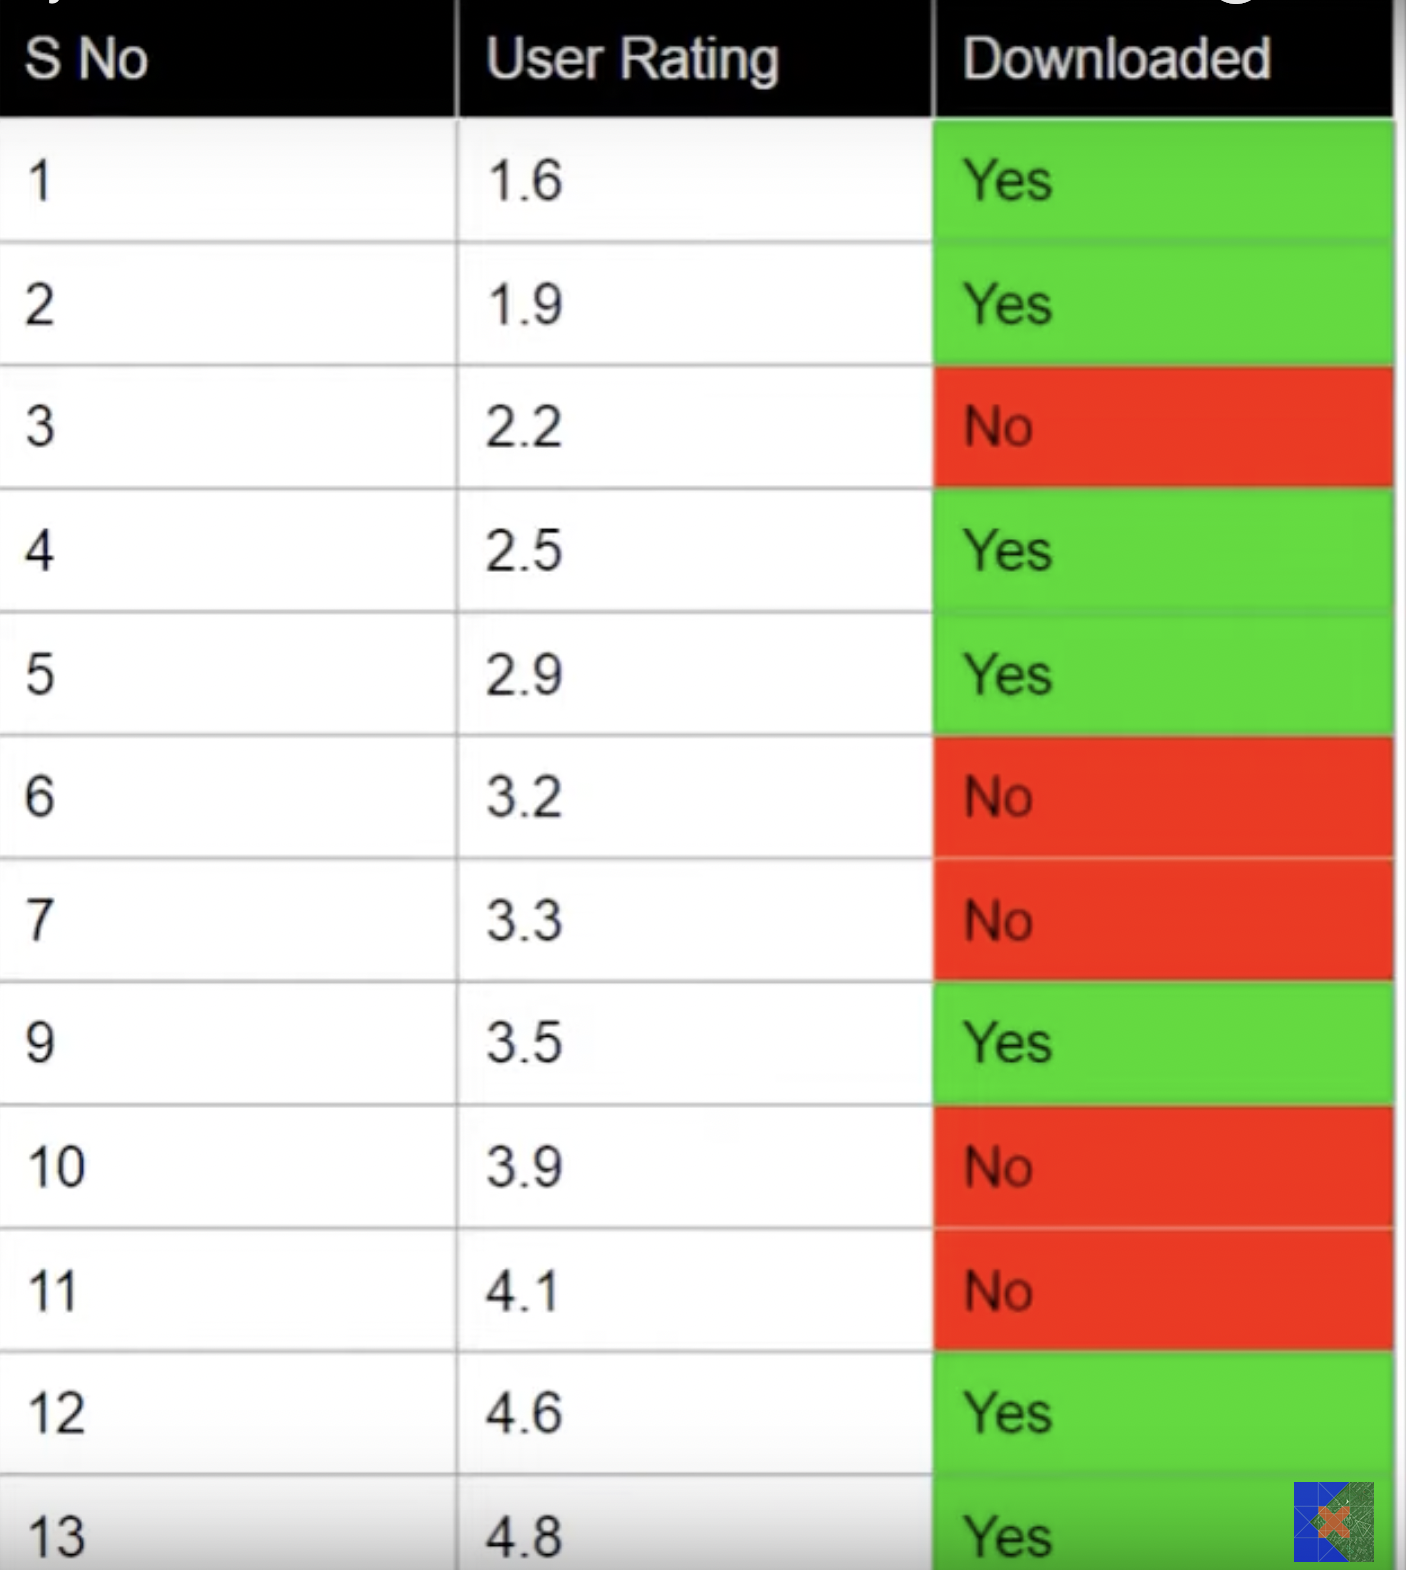
  
  2. Then we pick each value starting from 1.6 to 4.8 and we split the entire data on the basis of value of user_rating
    * rating > 1.6 then only one row will come left side and on RHS all remaining rows
    * rating > 1.9, two rows come in left and remaining rows in right
    * And we do for each value
    * Then we find entropy of each of the both datasets in each split, then for both entropy for each dataset inside each split we calculate weighted entropy, so for each split we have weighted entropy.
    * Then we subtract child entropy from parent entropy to get information gain for each split.
    * We select the max IG and that split will be selected as splitting criteria
    * We do it for recursively to get all leaf nodes

* For training this is bit computationally expensive but we need to do it in only training and in testing we just traverse tree so it is log(n) in testing phase.

### Tree algorithms:
- ID3, C4.5, C5.0 and CART
- ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.
- C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. This accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.
- CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yields the largest information gain at each node.

- ID3 and C.4.5 use Shannon Entropy to pick features with the greatest information gain as nodes. As an example, let's say we would like to classify animals. You would probably ask more general questions (like "Is it a mammal") first and once confirmed continue with more specific questions (like "is it a monkey"). In terms of information gain the general questions of our toy example gives you more information in addition to what you already know (that it is an animal).

- CART uses Gini Impurity instead. Gini Impurity is a measure of the homogeneity (or "purity") of the nodes. If all datapoints at one node belong to the same class then this node is considered "pure". So by minimising the Gini Impurity the decision tree finds the features the separate the data best.


### Advantages of Decision Trees:
* Intuitive and easy to understand
* Minimal data preparation is required
* Complexity is logarithmic, as Tree time complexity in DSA is log(N)
* Non feature scaling is required here
* It handles missing values automatically.
* The decision tree algorithm is not sensitive to imbalanced datasets because DT creates its own heirarchy.
* Outliers does not impact Decision tree.

### Disadvantages of Decision Trees:
* Decision overfits
* Prone to errors for imbalanced datasets.


### Hyperparameters of Decision Trees:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html